# Index Management

1. Create Index 
2. Retrieve list of database indexes.
3. Connect to a index
4. Describe index
5. Delete a index   

In [15]:
import pinecone
from tqdm.autonotebook import tqdm 

# API_KEY = "YOUR API KEY"
# ENV = "YOUR ENVIRONMENT"

pinecone.init(api_key = API_KEY, environment = ENV)

#### 1. Create Index

##### Different pod types:
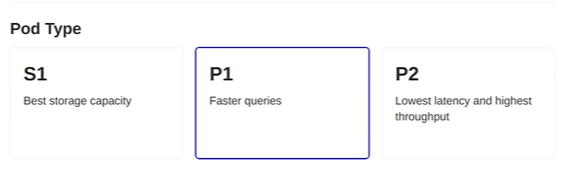

**Note:** Role of *pod* in a vector database index is to provide pre-configured hardware for efficient data retreival

In [16]:
pinecone.create_index("test", dimension=3, metric="dotproduct",
                     pod_type='s1') # sparse-dense vector
# delete existing one in free tier



<!-- #     ("A", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
#     ("B", [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
#     ("C", [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
#     ("D", [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]),
#     ("E", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) -->

#### 2. Retrieve list of database indexes.

In [17]:
pinecone.list_indexes()

['test']

#### 3. Connect to a index

In [18]:
idx = pinecone.Index('test')

#### 4. Describe index

In [19]:
pinecone.describe_index('test')

IndexDescription(name='test', metric='dotproduct', replicas=1, dimension=3.0, shards=1, pods=1, pod_type='starter', status={'ready': True, 'state': 'Ready'}, metadata_config=None, source_collection='')

In [20]:
description = pinecone.describe_index('test') # response 

In [21]:
if (description.status['state'] == 'Ready') :
    print('Index ready')
else: 
    print('Index not ready')

Index ready


In [22]:
description.dimension

3.0

In [23]:
description.pod_type

'starter'

In [28]:
pod_type = description.pod_type.split(".")[0]
if  (pod_type == 's1') or (pod_type=='p1'):
    print('Sparse-dense')

***Note***: If your Pinecone plan is the free version your pod_type maybe is 'starter' even if you asked to have a different pod_type when making the index.

#### 5. Delete a index  

In [26]:
pinecone.delete_index("test")